In [21]:
from scipy import linalg, array, dot, stats
import numpy as np
import math
import matplotlib.pyplot as plt
def plot2dcov(Mean=array([[0],[0]]), Cov=array([[1,0],[0,2]]), k=3, N=50, Title='First Gaussian distributions'):
    A = linalg.cholesky(Cov,lower=True)
    alpha = np.linspace(0, 2*math.pi, N)
    x = np.zeros((N,2))
    y = np.zeros((N,2))
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    for i in range(N):
        x[i,0] = k*math.cos(alpha[i])
        x[i,1] = k*math.sin(alpha[i])
        y[i,:] = dot(A, x[i,:]) + Mean.T
    Title = Title + ' with k = ' + str(k)
    plt.title(Title)
    plt.plot(x[:,0],x[:,1], 'r--', y[:,0],y[:,1], 'b--')
    ax.set_aspect('equal')
    plt.grid(True)
    plt.show()
def randomSamples(N=10, mean=array([[2],[2]]), Cov=array([[1,1.3],[1.3,3]])):
    x = np.zeros((N,2))
    x[:,0] = np.random.normal(0, 1, N)
    x[:,1] = np.random.normal(0, 1, N)
    A = linalg.cholesky(Cov,lower=True)
    X = np.zeros((N,2))
    for i in range(N):
        X[i,:] = dot(A, x[i,:]) + mean.T
    return X
def calParam(N=2, X=array([[2],[2]])):
    X_mean = [0, 0]
    X_mean[0] = sum(X[:,0]) / len(X[:,0])
    X_mean[1] = sum(X[:,1]) / len(X[:,1])
    X_mean = np.asarray(X_mean)
    Cov = np.zeros((2,2))
    for i in range(N):
        Cov += (X[i,:] - X_mean)*np.array([X[i,:] - X_mean]).T
    Cov /= N-1
    return X_mean, Cov
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

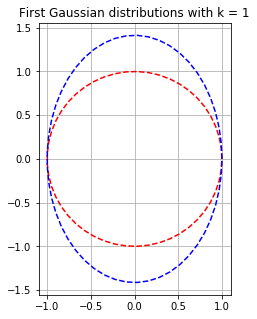

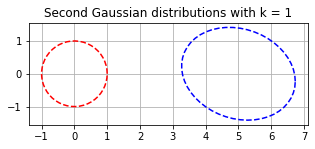

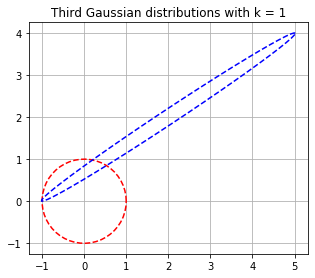

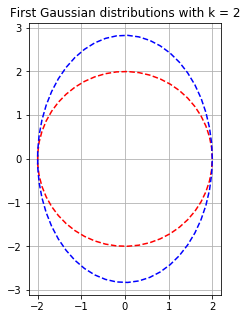

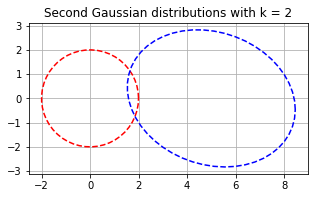

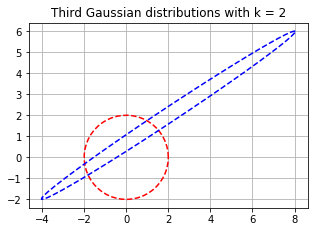

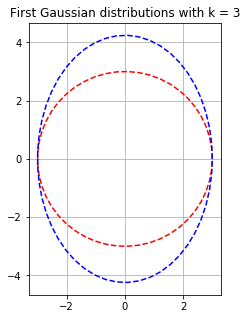

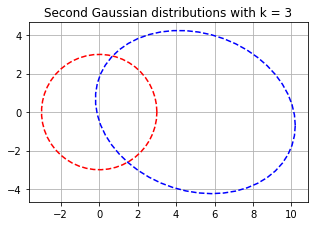

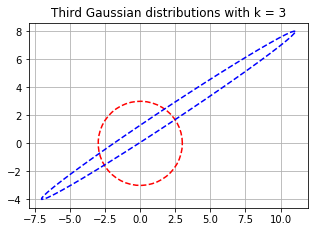

In [22]:
for i in [1,2,3]:
    plot2dcov(k=i)
    plot2dcov(Mean=array([[5],[0]]), Cov=array([[3,-0.4],[-0.4,2]]), k=i, N=50, Title='Second Gaussian distributions')
    plot2dcov(Mean=array([[2],[2]]), Cov=array([[9.1,6],[6,4]]), k=i, N=50, Title='Third Gaussian distributions')

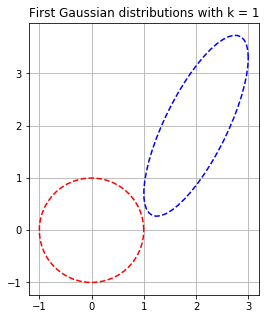

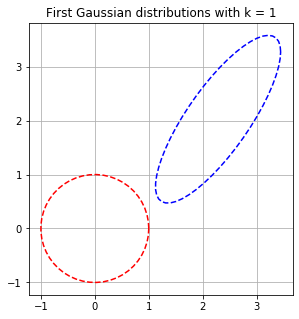

[[1.34442257 1.44745894]
 [1.44745894 2.41421845]] [2.28356745 2.02452895]


In [28]:
N = 15
mean_init=array([[2],[2]])
Cov_init=array([[1,1.3],[1.3,3]])
S = False
while(S == False):
    X = np.asarray(randomSamples(N, mean_init, Cov_init))
    X_mean, Cov = calParam(N,X)
    S = is_pos_def(Cov)
plot2dcov(mean_init, Cov_init, k=1, N=50)
plot2dcov(X_mean, Cov, k=1, N=50)
print(Cov, X_mean)

In [ ]:
"""
    The calculated mean and covariance values begin to diverge strongly when the number of samples is 15
"""